In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv("01.01.2022_test_covid19.csv")

In [3]:
del df['Unnamed: 6']
del df['Rapidas']
del df['Fecha']


df['Federal'] = df['Federal'].str.replace(',','')
df['U de G'] = df['U de G'].str.replace(',','')
df['Privado'] = df['Privado'].str.replace(',','')
df['Privado'] = df['Privado'].str.replace('Na','0')

df.rename(columns={'U de G':'UdeG'}, inplace=True)

df["Privado"] = df.Privado.astype(float)
df["UdeG"] = df.UdeG.astype(float)
df["Federal"] = df.Federal.astype(float)


df2 = df.iloc[:]
df2.head()

,Resultado,Federal,UdeG,Privado
0,Confirmados,190.0,0.0,18.0
1,Descartados,2601.0,110.0,271.0
2,Sospechosos,573.0,18.0,0.0
3,Confirmados,196.0,0.0,18.0
4,Descartados,2666.0,110.0,271.0


Text(0.5, 1.05, 'Resulting data')

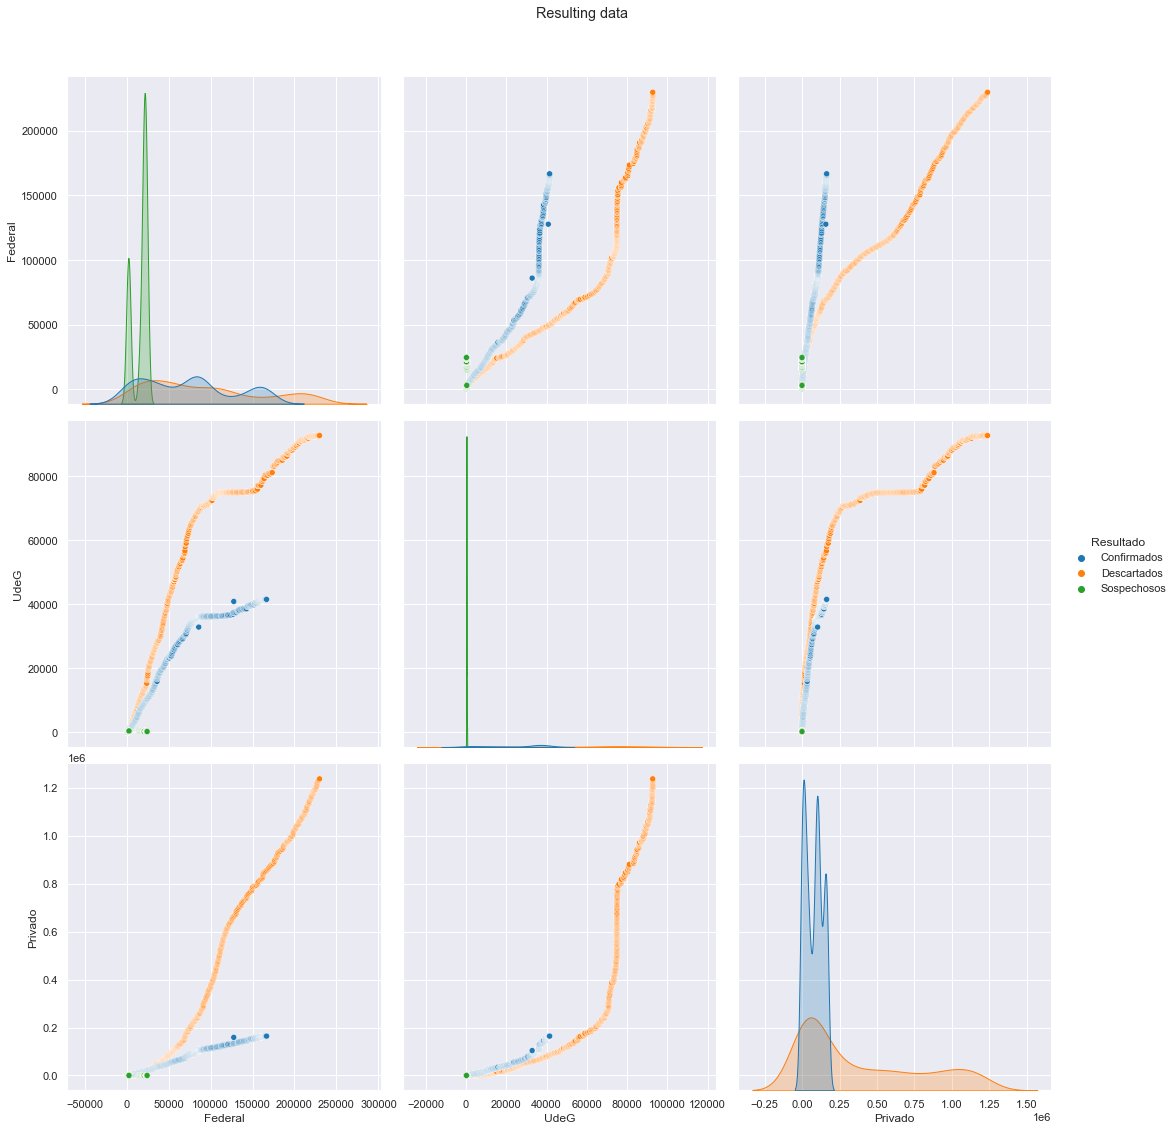

In [5]:
sns.pairplot(data=df2, hue='Resultado', palette='tab10', height=5)
plt.suptitle('Resulting data', y=1.05)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
numeric_cols = ['Federal','UdeG']
X = df.loc[:, numeric_cols]

# Implement the scaling
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# The scaler generates a numpy matrix for us. Convert to PDF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,Federal,UdeG
0,-1.008798,-0.908720
1,-0.968306,-0.904924
2,-1.002366,-0.908099
3,-1.008697,-0.908720
4,-0.967215,-0.904924


In [8]:
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

for k in grupos:
    model = KMeans(n_clusters=k, random_state = 47)

    clusters = model.fit_predict(X_norm)

    wcss.append(model.inertia_)

    sil_score.append(silhouette_score(X_norm, clusters))

Text(0.5, 1.0, 'Silhouette Score')

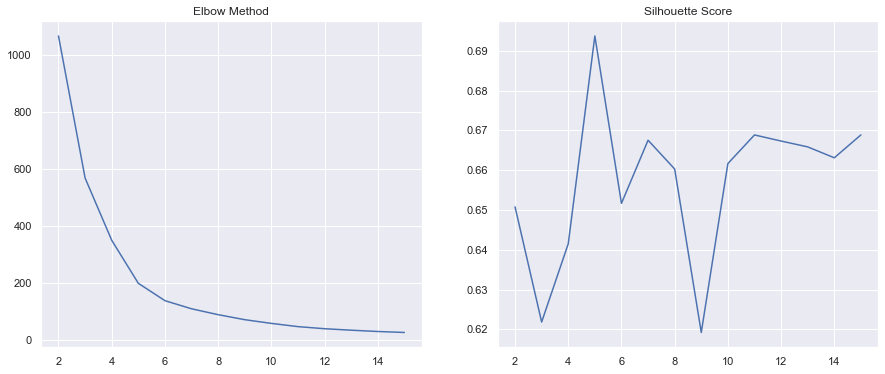

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Fig.1 Elbow Method
axs[0].plot(grupos, wcss)
axs[0].set_title('Elbow Method')

# Fig.2 Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

In [10]:
# Generate 5 groups
model = KMeans(n_clusters=5, random_state=47)
clusters = model.fit_predict(X_norm)

# Add the clusters to the original data
df['Grupo'] = clusters.astype('str')
df

,Resultado,Federal,UdeG,Privado,Grupo
0,Confirmados,190.0,0.0,18.0,0
1,Descartados,2601.0,110.0,271.0,0
2,Sospechosos,573.0,18.0,0.0,0
3,Confirmados,196.0,0.0,18.0,0
4,Descartados,2666.0,110.0,271.0,0
...,...,...,...,...,...
1870,Descartados,229152.0,92714.0,1233509.0,3
1871,Sospechosos,24561.0,206.0,0.0,0
1872,Confirmados,166698.0,41497.0,164162.0,4
1873,Descartados,229834.0,92714.0,1237204.0,3


In [ ]:
sns.pairplot(data=df, hue='Grup', palette='tab10', height=5)
plt.suptitle('5 test groups', y=1.05)

<ul>
    <li> Group 1: Low concentration of confirmed and discarded tests grow, but it is a very mild stage of the pandemic</li>
    <li> Group 2: Aggressive application of tests, with all cases being discarded. Shows COVID control tests</li>
    <li> Group 3: Stage where a slight increase in applied tests is seen, with growth in both discarded and confirmed cases. Could be a key stage to prevent a wave</li>
    <li> Group 4: Second stage of aggressive testing application, less aggressive but still in control, as most are discarded</li>
    <li> Group 5: Worst stage of the pandemic, aggressive testing application and highest number of confirmed cases of the year.</li>
</ul>